In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Data/Processed/cleaned_csv.csv")
df.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M


In [3]:
df.work_year.value_counts()

work_year
2023    2088
2024    1237
2022     622
2021     224
2020      77
Name: count, dtype: int64

In [4]:
#top 5 job titles

In [5]:
top_jobs = df.job_title.value_counts().head(5).reset_index()
top_jobs.columns = ['job_title', 'count']
type(top_jobs)

pandas.core.frame.DataFrame

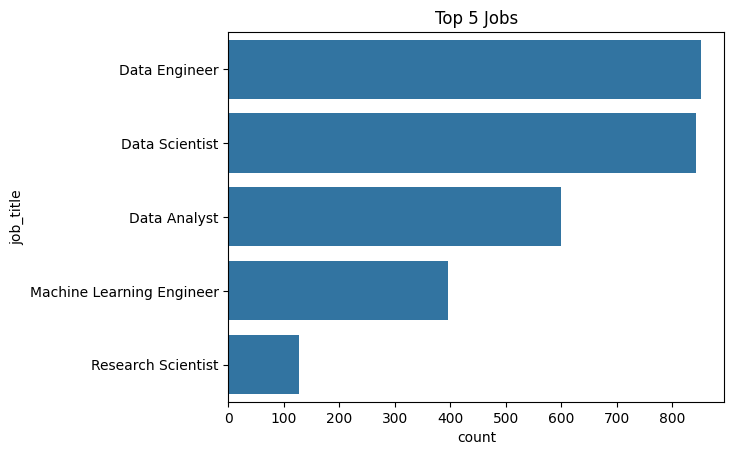

In [6]:
sns.barplot(data=top_jobs, x = 'count', y = 'job_title')
plt.title("Top 5 Jobs")
plt.show()

In [7]:
#employement type vs average salary

In [8]:
emptype_salary = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
emptype_salary.columns = ['type','Avg_salary']
emptype_salary

,type,Avg_salary
0,FT,144255.390540
1,CT,124944.857143
2,PT,54625.941176
3,FL,43900.000000


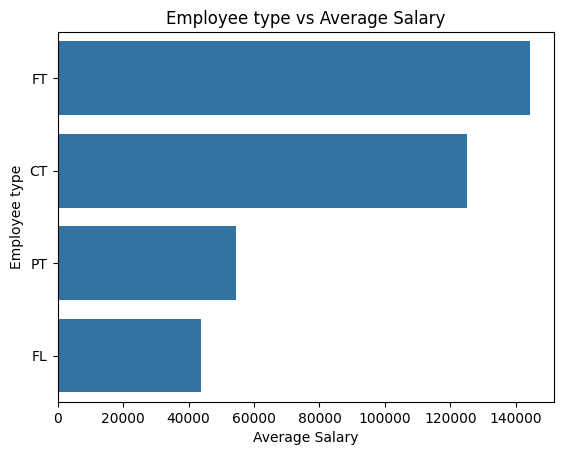

In [40]:
sns.barplot(data=emptype_salary, x = 'Avg_salary' , y = 'type')
plt.title("Employee type vs Average Salary")
plt.ylabel("Employee type")
plt.xlabel("Average Salary")
plt.show()

In [10]:
#exp vs avg salary 

In [11]:
exp_vs_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values().reset_index()

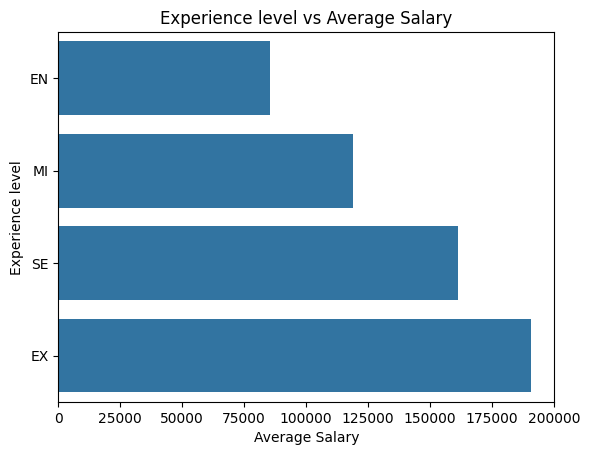

In [39]:
sns.barplot(data=exp_vs_salary, x = 'salary_in_usd', y = 'experience_level')
plt.title("Experience level vs Average Salary")
plt.xlabel("Average Salary")
plt.ylabel("Experience level")
plt.show()

In [13]:
#avg salary vs jobs for entry experience

In [14]:
fresher_job_vs_salary = df[df['experience_level']=='EN'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
fresher_job_vs_salary

,job_title,median_salary,job_count
0,Research Engineer,156750.0,4
1,Business Intelligence,154000.0,2
2,Machine Learning Scientist,152500.0,2
3,Applied Scientist,151260.0,5
4,Research Scientist,150000.0,13
5,Data Integration Engineer,135000.0,1
6,MLOps Engineer,133000.0,1
7,Computer Vision Software Engineer,110000.0,2
8,Data Science Engineer,104024.0,1
9,Product Data Analyst,100000.0,1


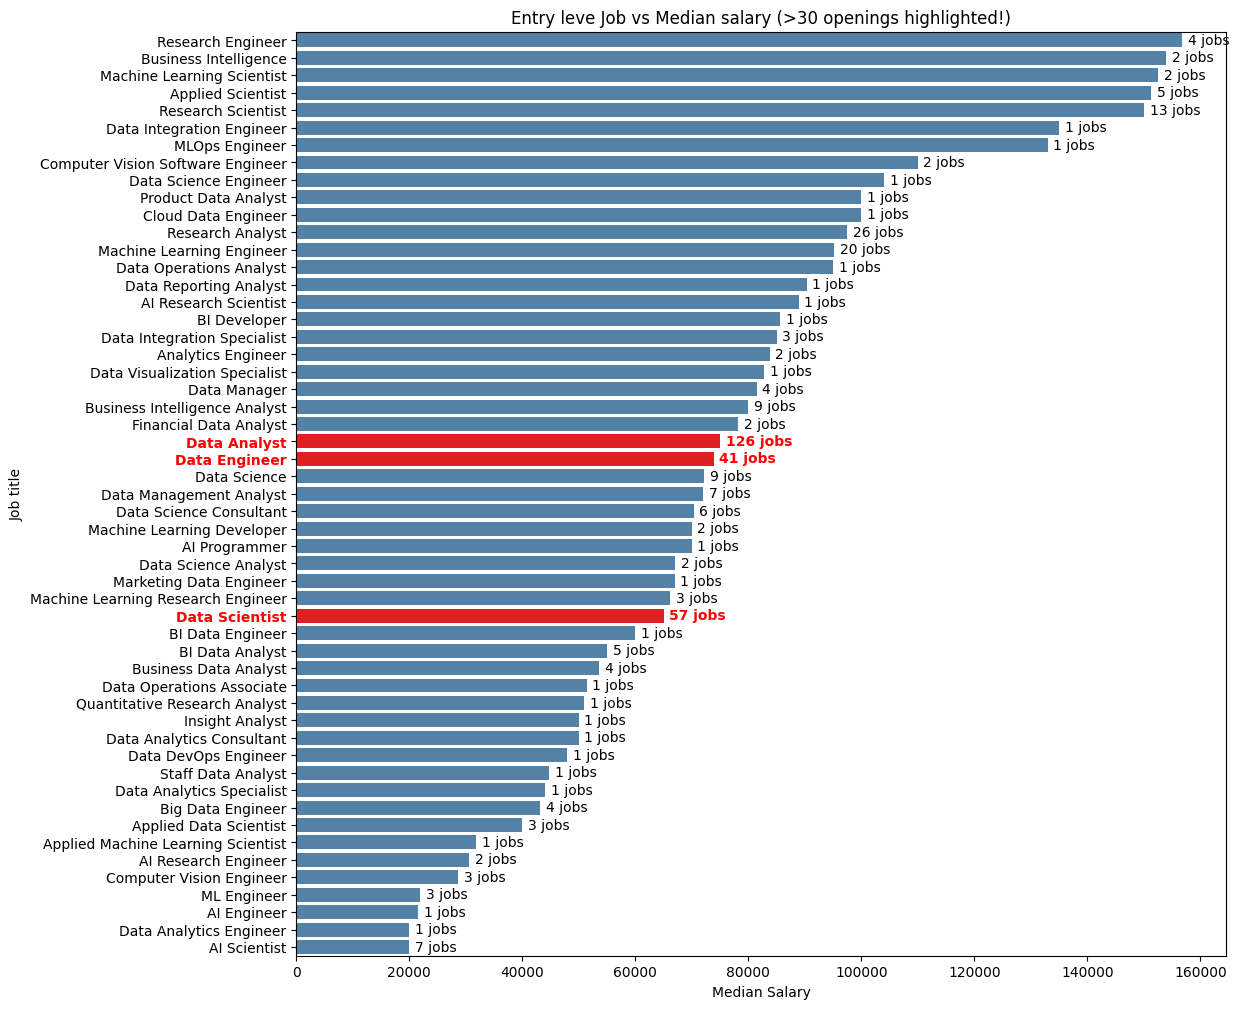

In [25]:
thrushold = 30
fresher_job_vs_salary['highlight'] = fresher_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,12))
ax = sns.barplot(data=fresher_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in fresher_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if fresher_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Entry leve Job vs Median salary (>30 openings highlighted!)")
plt.show()

In [79]:
mid_experience_job_vs_salary = df[df['experience_level']=='MI'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
mid_experience_job_vs_salary

,job_title,median_salary,job_count
0,Data Infrastructure Engineer,385000.0,1
1,Financial Data Analyst,290000.0,2
2,AWS Data Architect,258000.0,1
3,Prompt Engineer,220880.0,2
4,Machine Learning Software Engineer,217600.0,1
...,...,...,...
88,Business Data Analyst,36000.0,7
89,Head of Data,32974.0,1
90,Big Data Engineer,22611.0,3
91,Product Data Analyst,16417.0,3


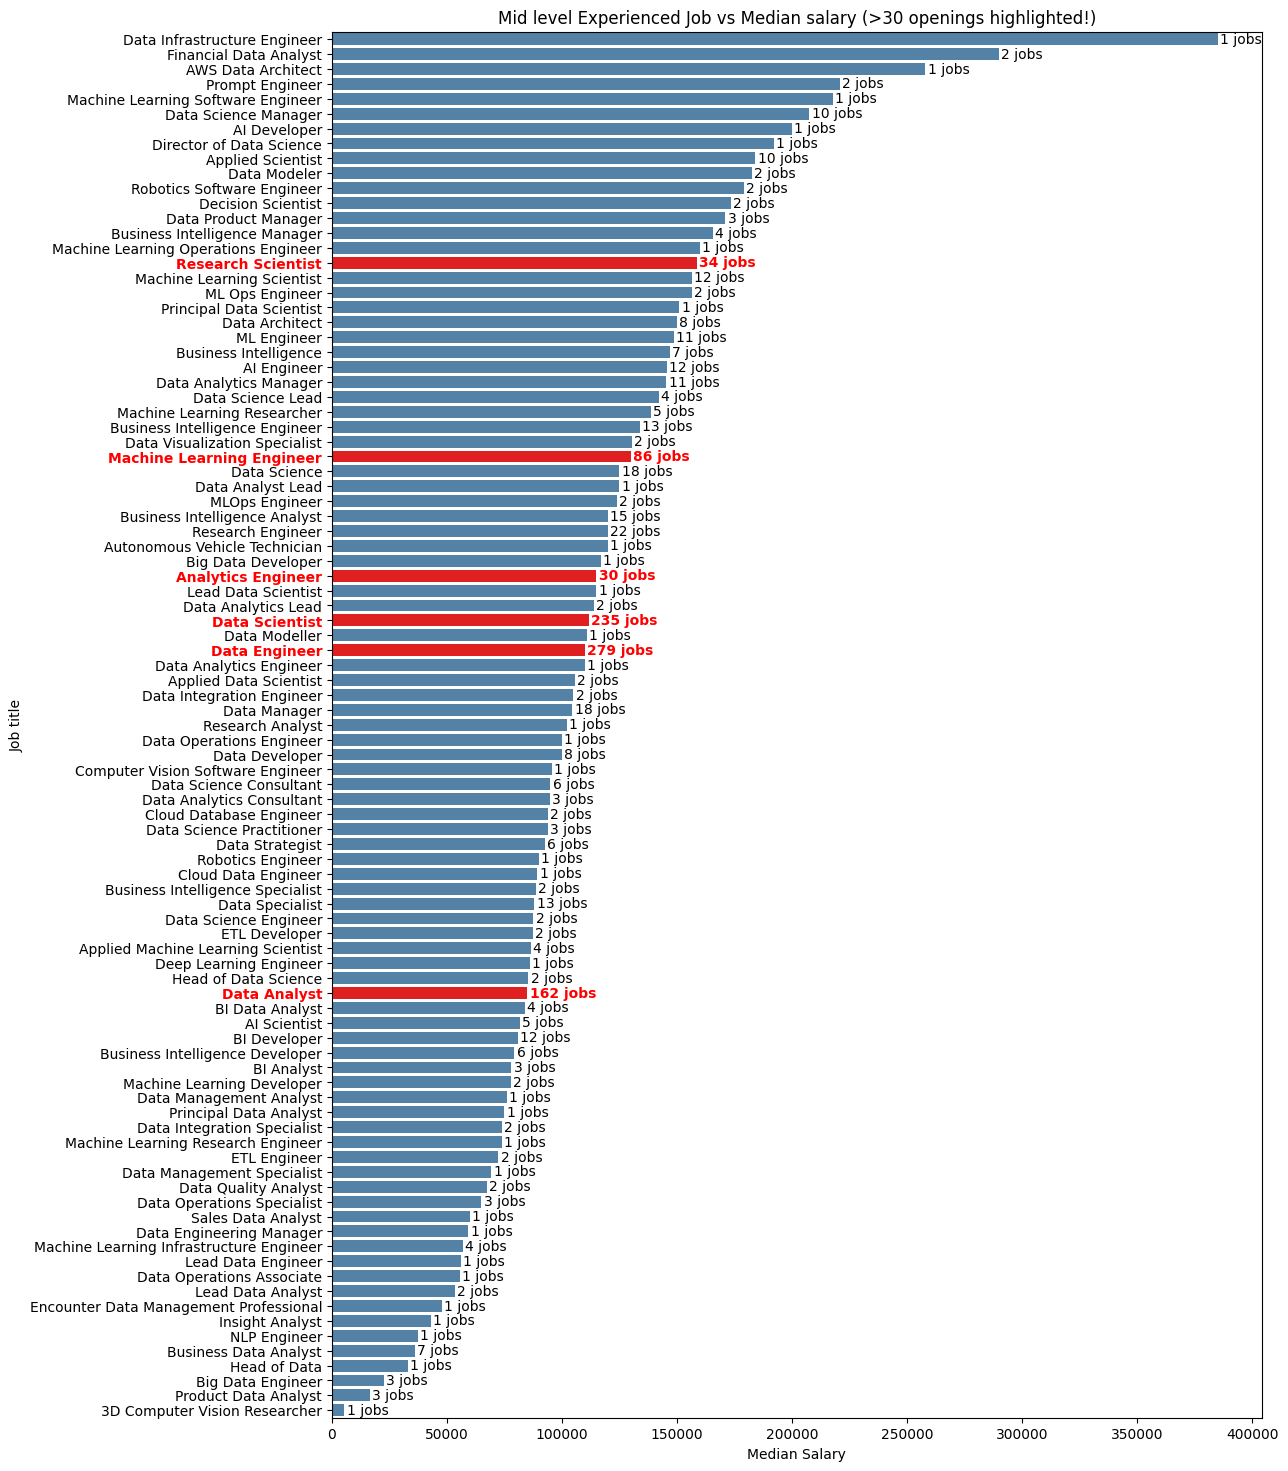

In [83]:
thrushold = 30
mid_experience_job_vs_salary['highlight'] = mid_experience_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,18))
ax = sns.barplot(data=mid_experience_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in mid_experience_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if mid_experience_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Mid level Experienced Job vs Median salary (>30 openings highlighted!)")
plt.show()

In [84]:
senior_job_vs_salary = df[df['experience_level']=='SE'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
senior_job_vs_salary

,job_title,median_salary,job_count
0,Applied Data Scientist,278500.0,2
1,Data Operations Engineer,264560.0,2
2,Robotics Software Engineer,240000.0,3
3,Head of Data,213250.0,4
4,MLOps Engineer,211150.0,2
...,...,...,...
90,Machine Learning Developer,69395.5,2
91,Data Analytics Engineer,64598.5,2
92,Finance Data Analyst,61896.0,1
93,CRM Data Analyst,40000.0,1


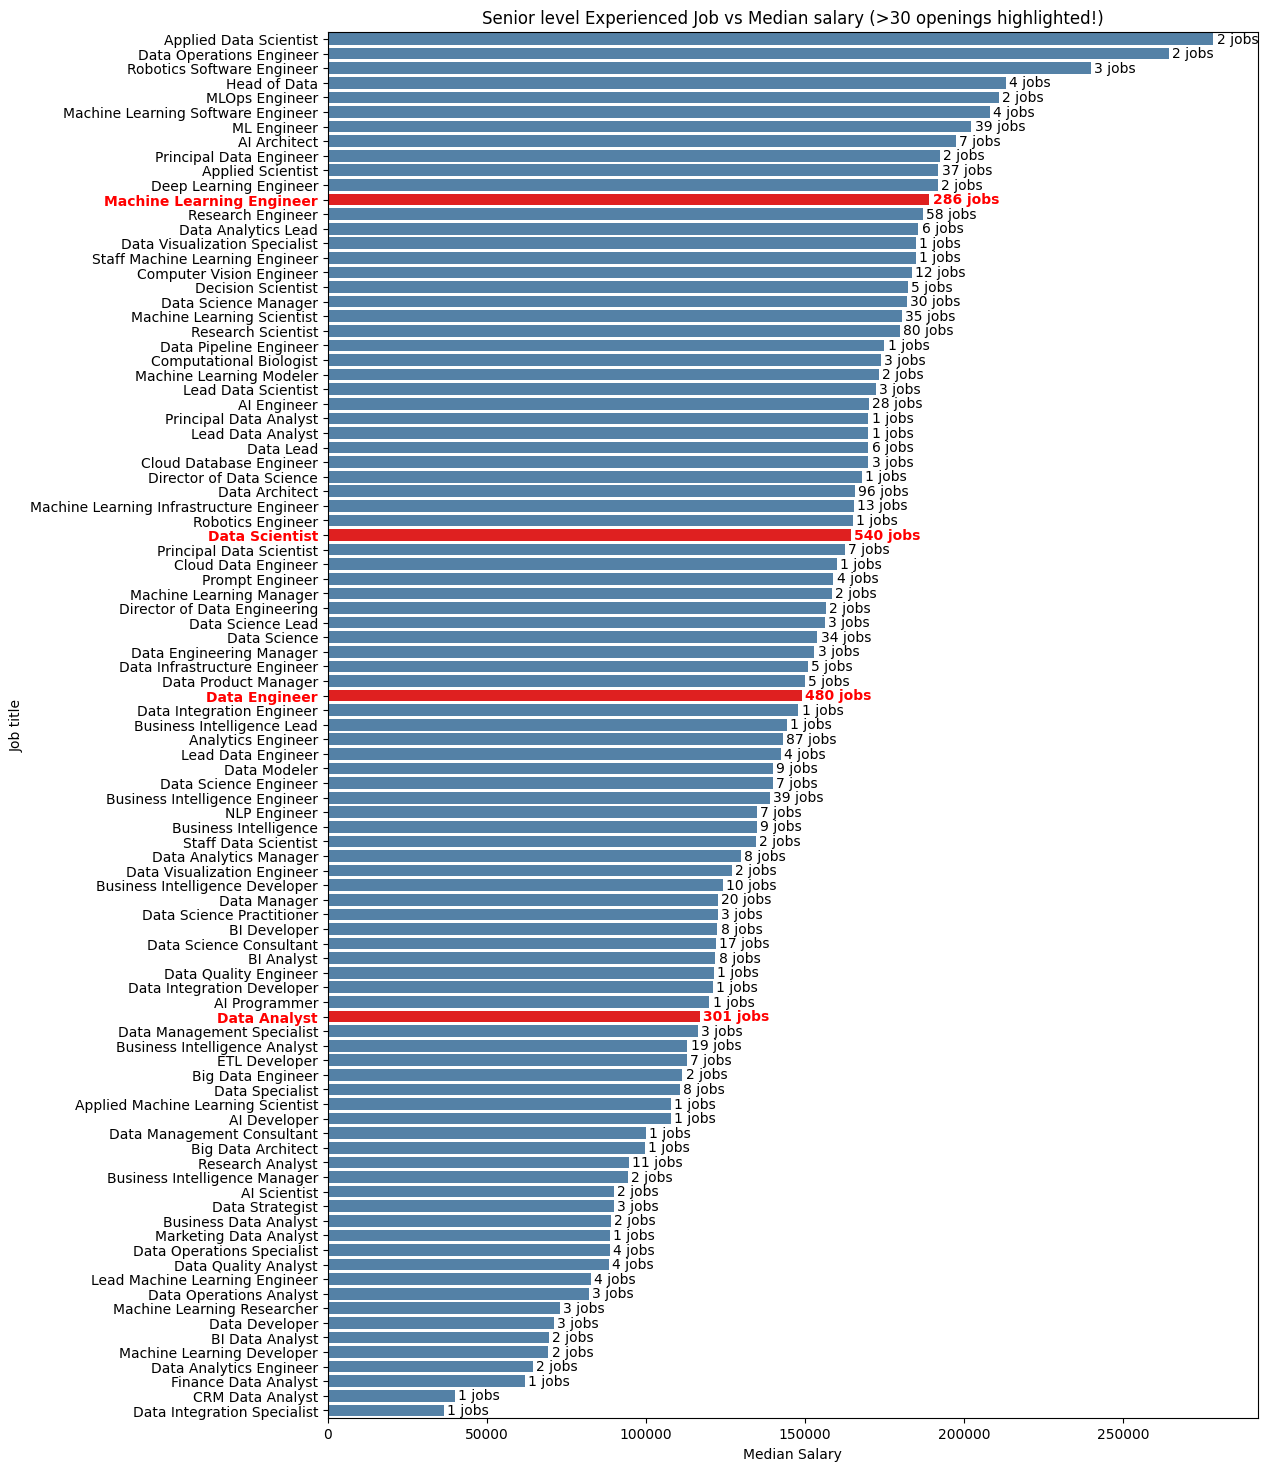

In [87]:
thrushold = 100
senior_job_vs_salary['highlight'] = senior_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,18))
ax = sns.barplot(data=senior_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in senior_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if senior_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Senior level Experienced Job vs Median salary (>30 openings highlighted!)")
plt.show()

In [91]:
Expert_level_job_vs_salary = df[df['experience_level']=='EX'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
Expert_level_job_vs_salary

,job_title,median_salary,job_count
0,Principal Data Engineer,600000.0,1
1,Principal Data Scientist,416000.0,1
2,Machine Learning Engineer,232750.0,4
3,Data Lead,230000.0,1
4,Director of Data Science,225000.0,15
5,Research Scientist,220000.0,1
6,Data Science,220000.0,7
7,Head of Machine Learning,216500.0,6
8,AI Architect,215936.0,1
9,Head of Data,204500.0,19


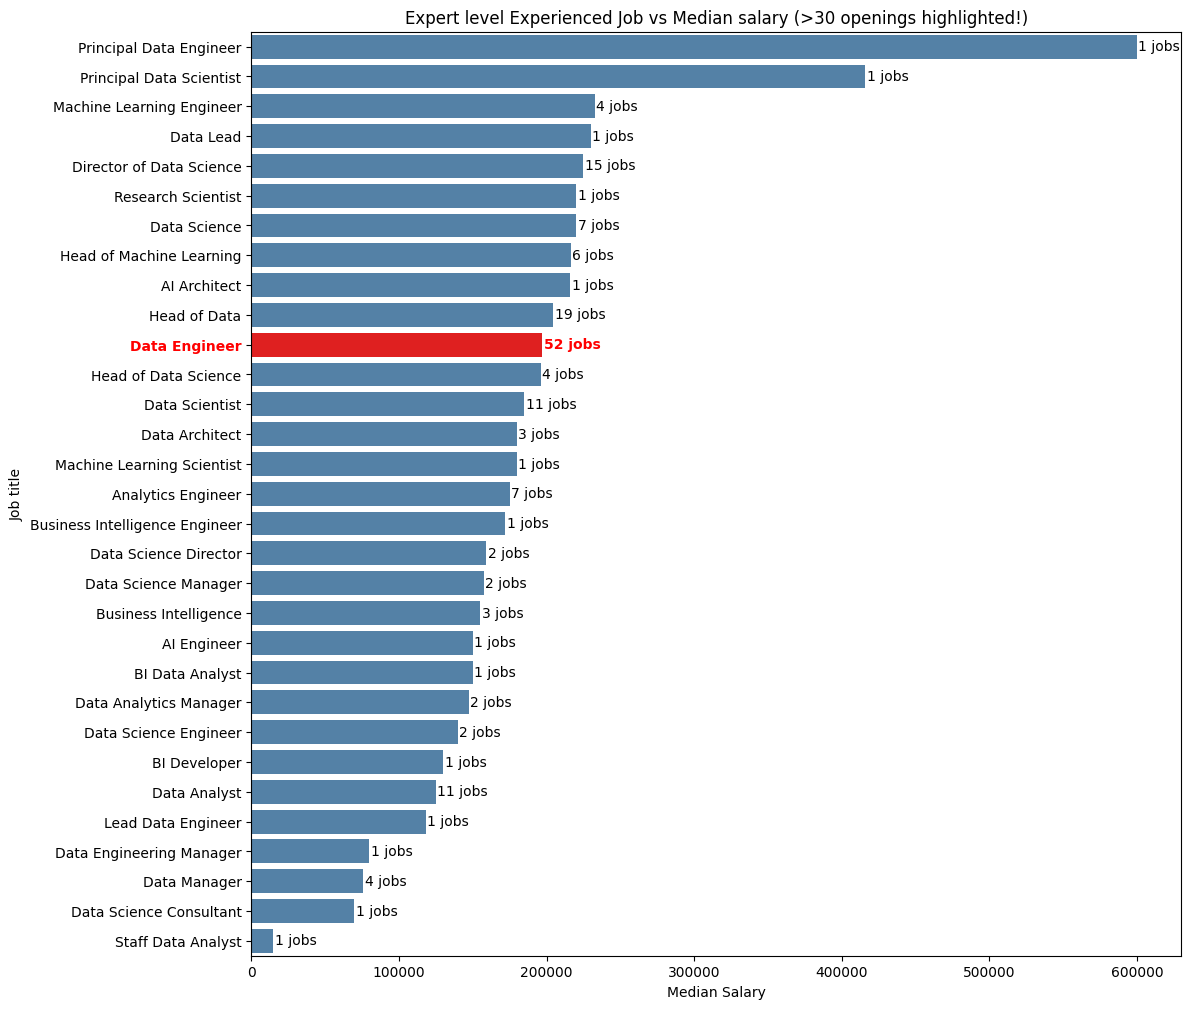

In [94]:
thrushold = 20
Expert_level_job_vs_salary['highlight'] = Expert_level_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,12))
ax = sns.barplot(data=Expert_level_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in Expert_level_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if Expert_level_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Expert level Experienced Job vs Median salary (>30 openings highlighted!)")
plt.show()

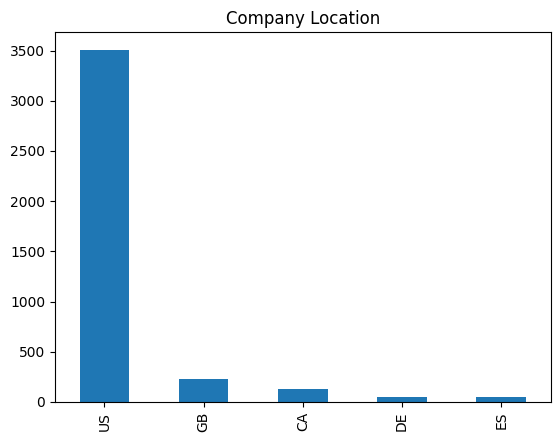

In [78]:
df.company_location.value_counts().head(5).plot(kind = 'bar')
plt.title("Company Location")
plt.xlabel("")
plt.show()

In [32]:
#avg salary vs company size 

<Axes: xlabel='company_size'>

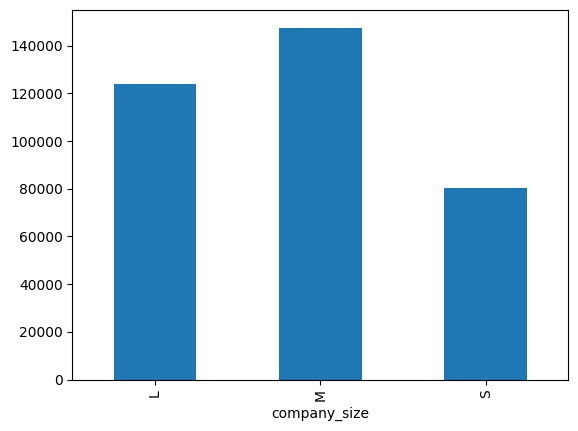

In [36]:
df.groupby("company_size")['salary_in_usd'].mean().plot(kind='bar')

In [67]:
grouped_df= df.groupby(["job_title","work_year"])['salary_in_usd'].mean().reset_index().head(80)
grouped_df

,job_title,work_year,salary_in_usd
0,3D Computer Vision Researcher,2021,5409.000000
1,AI Architect,2023,224209.000000
2,AI Architect,2024,189812.500000
3,AI Developer,2023,154000.000000
4,AI Engineer,2023,154226.291667
...,...,...,...
75,Data Analyst,2022,97546.284404
76,Data Analyst,2023,105841.553746
77,Data Analyst,2024,109945.440252
78,Data Analyst Lead,2024,125000.000000


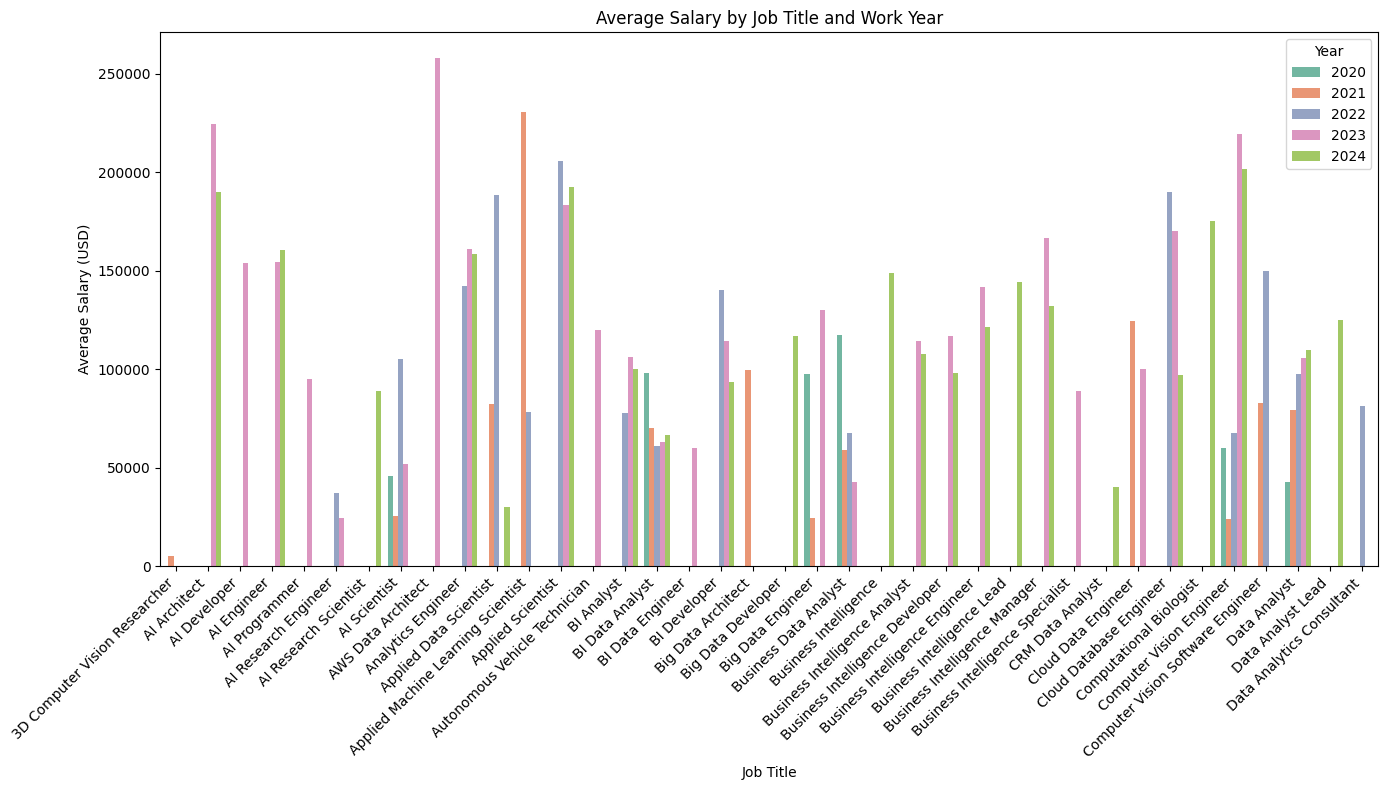

In [68]:
plt.figure(figsize=(14, 8))

# Barplot with job_title on x-axis, salary on y-axis, and year as hue
sns.barplot(
    data=grouped_df,
    x="job_title",
    y="salary_in_usd",
    hue="work_year",
    palette="Set2"
)

plt.xticks(rotation=45, ha='right')  # rotate x labels for readability
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Job Title and Work Year")
plt.tight_layout()
plt.legend(title="Year")
plt.show()
